In [ ]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs
 
 
import pathlib
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
 
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset_band_gap_features_selected.csv')
dataset.head()

,material_id,formula,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons,compound possible
0,mp-441,Rb2Te,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.25509,10.000000,6.173657,0.25509,2.000000,1.147903e+00,1.000000,5.739515e-01,0.46400,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556,True
1,mp-22881,CdCl2,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.00000,10.000000,5.931384,0.00000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.49300,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615,True
2,mp-28013,MnI2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.00000,5.000000,2.957716,0.00000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.06200,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756,True
3,mp-567290,LaN,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.00000,0.942203,0.942203,0.00000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.06496,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,15.0,6.000000

In [ ]:
dataset.columns

Index(['material_id', 'formula', 'band_gap', 'volume', 'poly_electronic',
       'poly_total', 'minimum CN_VoronoiNN', 'mean CN_VoronoiNN',
       'min relative bond length', 'minimum neighbor distance variation',
       'mean ordering parameter shell 3', 'max packing efficiency',
       'maximum local difference in MeltingT',
       'range local difference in MeltingT',
       'avg_dev local difference in MeltingT',
       'minimum local difference in Column',
       'range local difference in Column',
       'maximum local difference in Electronegativity',
       'range local difference in Electronegativity',
       'avg_dev local difference in Electronegativity',
       'avg_dev local difference in NsValence',
       'maximum local difference in NdValence',
       'mean local difference in NdValence',
       'avg_dev local difference in NsUnfilled',
       'maximum local difference in NpUnfilled',
       'range local difference in NpUnfilled',
       'maximum local difference in NUn

In [ ]:
unwanted_columns = ['material_id', 'formula','compound possible']
dataset = dataset.drop(unwanted_columns, axis=1)
dataset.head()

,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons
0,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.25509,10.000000,6.173657,0.25509,2.000000,1.147903e+00,1.000000,5.739515e-01,0.46400,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556
1,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.00000,10.000000,5.931384,0.00000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.49300,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615
2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.00000,5.000000,2.957716,0.00000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.06200,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756
3,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.00000,0.942203,0.942203,0.00000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.06496,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,15.0,6.000000,6.0,4.000000,2.0,71.0,207.0,139.000000,71.0,3.04,2.070000,1.10,3.0,0.0,1.0,1.0,0.500000,0.500000,3.0,3.0,9.0

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("band_gap")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
volume,826.0,166.527332,99.010041,20.002080,95.133518,145.186018,212.685979,597.341134
poly_electronic,826.0,7.527252,14.514257,1.670000,3.082500,4.740000,7.387500,256.840000
poly_total,826.0,15.414891,21.243161,2.080000,7.577500,10.635000,15.795000,277.780000
minimum CN_VoronoiNN,826.0,6.670176,1.471121,4.000000,5.999231,6.000009,7.644716,11.956922
mean CN_VoronoiNN,826.0,9.197163,1.842335,4.363803,8.017747,9.316227,10.664210,12.400435
...,...,...,...,...,...,...,...,...
MagpieData range GSbandgap,826.0,1.905262,2.057965,0.000000,0.464000,1.625000,2.202000,7.853000
MagpieData mean GSbandgap,826.0,1.060093,1.166732,0.000000,0.159800,0.880800,1.477500,6.723667
frac s valence electrons,826.0,0.281114,0.154505,0.071429,0.176471,0.250000,0.342634,1.000000
frac p valence electrons,826.0,0.337790,0.171830,0.000000,0.200000,0.318182,0.500000,0.714286


In [ ]:
train_labels = train_dataset.pop('band_gap')
test_labels = test_dataset.pop('band_gap')

In [ ]:
import sklearn
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(60, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3900      
_________________________________________________________________
dense_1 (Dense)              (None, 45)                2745      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1104      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4

In [ ]:
example_batch = normed_train_data[:9]
example_result = model.predict(example_batch)
example_result

array([[-0.00862786],
       [-0.00453752],
       [-0.00925736],
       [-0.00565005],
       [-0.00956411],
       [-0.00543838],
       [-0.00673469],
       [ 0.01524887],
       [-0.00352521]], dtype=float32)

In [ ]:
EPOCHS = 1100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:3.5252,  mae:1.3499,  mse:3.5252,  val_loss:1.6177,  val_mae:1.0292,  val_mse:1.6177,  
....................................................................................................
Epoch: 100, loss:0.0439,  mae:0.1482,  mse:0.0439,  val_loss:0.5352,  val_mae:0.5199,  val_mse:0.5352,  
....................................................................................................
Epoch: 200, loss:0.0216,  mae:0.1038,  mse:0.0216,  val_loss:0.4925,  val_mae:0.4893,  val_mse:0.4925,  
....................................................................................................
Epoch: 300, loss:0.0137,  mae:0.0829,  mse:0.0137,  val_loss:0.5064,  val_mae:0.5005,  val_mse:0.5064,  
....................................................................................................
Epoch: 400, loss:0.0166,  mae:0.0881,  mse:0.0166,  val_loss:0.4605,  val_mae:0.4647,  val_mse:0.4605,  
........................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1095,0.009685,0.064351,0.009685,0.486540,0.491572,0.486540,1095
1096,0.004005,0.045499,0.004005,0.484313,0.490092,0.484313,1096
1097,0.007439,0.062163,0.007439,0.477159,0.483576,0.477159,1097
1098,0.007747,0.062149,0.007747,0.466675,0.471962,0.466675,1098
1099,0.007106,0.058743,0.007106,0.477040,0.478583,0.477040,1099


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

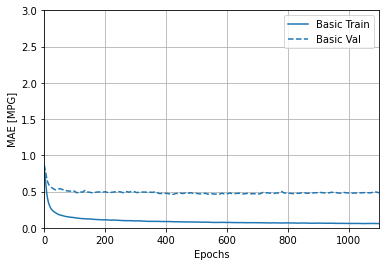

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0,3])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

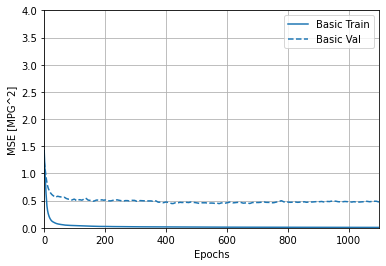

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 4])
plt.ylabel('MSE [MPG^2]')

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4.3053,  mae:1.4616,  mse:4.3053,  val_loss:1.9235,  val_mae:1.0410,  val_mse:1.9235,  
....................................................................................................
Epoch: 100, loss:0.0309,  mae:0.1253,  mse:0.0309,  val_loss:0.6041,  val_mae:0.5024,  val_mse:0.6041,  
....................................................................................................
Epoch: 200, loss:0.0259,  mae:0.1040,  mse:0.0259,  val_loss:0.5770,  val_mae:0.4883,  val_mse:0.5770,  
............................................................................................

Text(0, 0.5, 'MAE [MPG]')

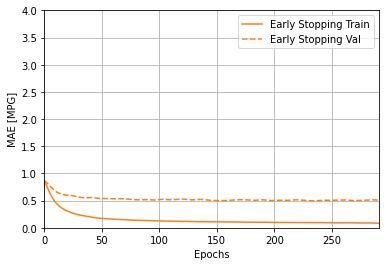

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 4])
plt.ylabel('MAE [MPG]')

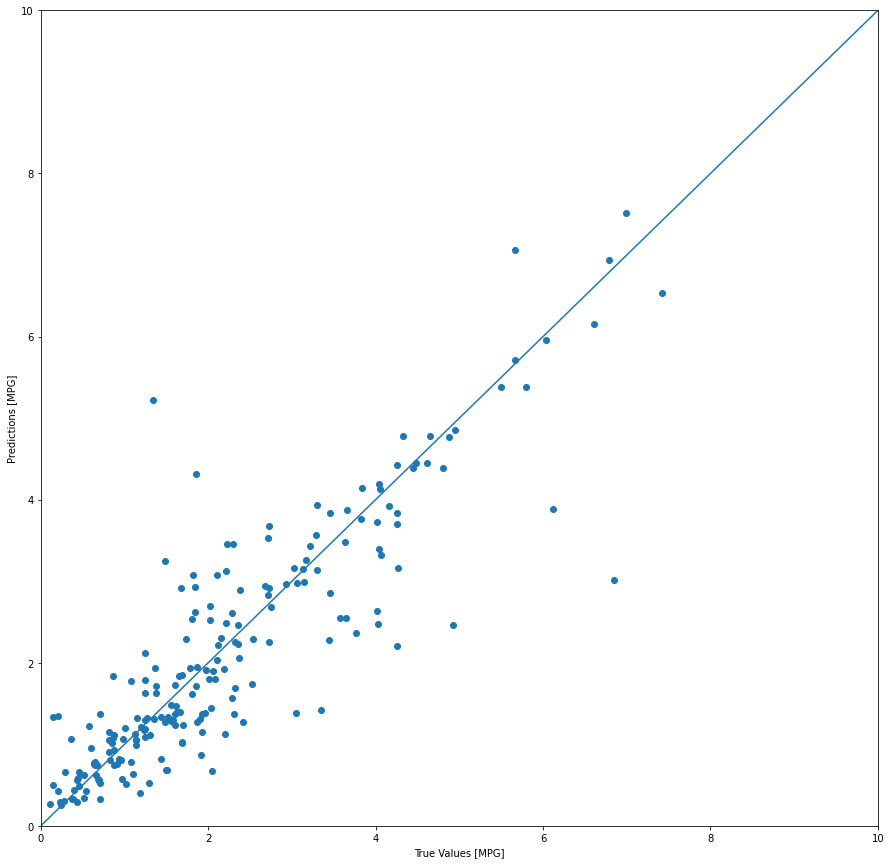

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

#a = plt.axes(aspect='equal')
plt.figure(figsize=(15,15))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
from sklearn import metrics
print('R^2               :', np.sqrt(metrics.r2_score(test_labels, test_predictions)))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, test_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, test_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, test_predictions)))

R^2               : 0.874932505790753
Mean Absolute Error: 0.47881008816801973
Mean Squared Error: 0.5642509530464472
Root Mean Squared Error: 0.7511663950460292


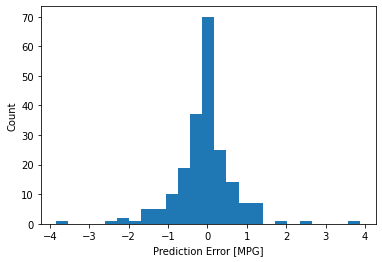

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")